# **R** **Programming**

## **Loading all required packages**

In [ ]:
install.packages("tidyverse")
install.packages("caret")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("pROC")
install.packages("randomForest")
install.packages("Boruta")

library(tidyverse)
library(caret)
library(ggplot2)
library(dplyr)
library(pROC)
library(randomForest)
library(Boruta)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘ranger’


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




## **1. Basic Data Structures in R**



R, a programming language and environment designed for statistical computing and graphics, employs various data structures for organizing and storing data efficiently. Among the fundamental data structures in R are:

**1. R Vectors**

Vectors are one-dimensional data structures. The only key thing here is all the elements of a vector
must be of the identical data type.


In [ ]:
fruits <- c("banana", "apple", "orange", "guava")

fruits

[1] "banana" "apple"  "orange" "guava"

In [ ]:
numbers = c(1, 2, 3, 4, 5)

numbers

[1] 1 2 3 4 5

**2. R Lists**

A list in R can contain many different data types inside it. A list is a collection of data which is ordered and changeable.

In [ ]:
thislist <- list("apple", "banana", "cherry")

thislist

[[1]]
[1] "apple"

[[2]]
[1] "banana"

[[3]]
[1] "cherry"

In [ ]:
thislist <- list("apple", "banana", "cherry")
thislist[1] <- "blackcurrant"

# updated list
thislist

[[1]]
[1] "blackcurrant"

[[2]]
[1] "banana"

[[3]]
[1] "cherry"

**3. R Matrices**


A matrix is a two dimensional data set with columns and rows.

A column is a vertical representation of data, while a row is a horizontal representation of data.

In [ ]:
thismatrix <- matrix(c(1,2,3,4,5,6), nrow = 3, ncol = 2)

thismatrix

1,4
2,5
3,6


In [ ]:
thismatrix <- matrix(c("apple", "banana", "cherry", "orange"), nrow = 2, ncol = 2)

thismatrix[1, 2]

[1] "cherry"

**4. R Arrays**

Arrays can have more than two dimensions.

In [ ]:
thisarray <- c(1:24)
thisarray

multiarray <- array(thisarray, dim = c(4, 3, 2))
multiarray

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24

, , 1

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12

, , 2

     [,1] [,2] [,3]
[1,]   13   17   21
[2,]   14   18   22
[3,]   15   19   23
[4,]   16   20   24

In [ ]:
thisarray <- c(1:24)
multiarray <- array(thisarray, dim = c(4, 3, 2))

multiarray[2, 3, 2]

[1] 22

**5. R Data Frames**

Data Frames present information in a tabular format, resembling a table structure.

They are versatile, allowing the inclusion of various data types. The initial column may consist of characters, while subsequent columns can contain numeric or logical data. It's essential to maintain uniform data types within each column.

In [ ]:
Data_Frame <- data.frame (
  Training = c("Strength", "Stamina", "Other"),
  Pulse = c(100, 150, 120),
  Duration = c(60, 30, 45)
)

Data_Frame

Training,Pulse,Duration
<chr>,<dbl>,<dbl>
Strength,100,60
Stamina,150,30
Other,120,45


In [ ]:
Data_Frame <- data.frame (
  Training = c("Strength", "Stamina", "Other"),
  Pulse = c(100, 150, 120),
  Duration = c(60, 30, 45)
)

summary(Data_Frame)

   Training             Pulse          Duration   
 Length:3           Min.   :100.0   Min.   :30.0  
 Class :character   1st Qu.:110.0   1st Qu.:37.5  
 Mode  :character   Median :120.0   Median :45.0  
                    Mean   :123.3   Mean   :45.0  
                    3rd Qu.:135.0   3rd Qu.:52.5  
                    Max.   :150.0   Max.   :60.0  

**6. R Factors**

Factors are used to categorize data.

In [ ]:
music_genre <- factor(c("Jazz", "Rock", "Classic", "Classic", "Pop", "Jazz", "Rock", "Jazz"))

music_genre

[1] Jazz    Rock    Classic Classic Pop     Jazz    Rock    Jazz   
Levels: Classic Jazz Pop Rock

In [ ]:
music_genre <- factor(c("Jazz", "Rock", "Classic", "Classic", "Pop", "Jazz", "Rock", "Jazz"))

length(music_genre)

[1] 8

## **2. Linear Regression in R**


In the realm of R programming, Linear Regression stands as a fundamental statistical method employed to predict a continuous outcome using input features. This technique presupposes a linear association between the predictor variables and the target variable. By estimating coefficients, the model reveals the influence of each feature on the target variable. Renowned for its simplicity and interpretability, Linear Regression offers insights into both the direction and magnitude of feature effects. Nevertheless, it assumes linearity and can be sensitive to outliers. Despite these considerations, Linear Regression retains its significance in R for tasks where comprehending the linear relationship between variables holds paramount importance.

In [ ]:
data(mtcars)

write.csv(mtcars, "mtcars.csv", row.names = FALSE)

In [ ]:
data <- read.csv("mtcars.csv")

summary(data)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [ ]:
data <- na.omit(data)

 head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [ ]:
set.seed(123)

# Create an index for splitting (80% training, 20% testing)
index <- createDataPartition(mtcars$mpg, p = 0.8, list = FALSE)

# Split the dataset
train_data <- mtcars[index, ]
test_data <- mtcars[-index, ]

In [ ]:
Y_train <- train_data$mpg

Y_test <- test_data$mpg

X_train <- train_data[, -c(1)]

X_test <- test_data[, -c(1)]

In [ ]:
# Fit a linear regression model on the training set
model <- lm(Y_train ~ ., data = X_train)

summary(model)


Call:
lm(formula = Y_train ~ ., data = X_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2742 -1.3609 -0.2707  1.1921  4.9877 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -2.81069   22.93545  -0.123    0.904
cyl          0.75593    1.21576   0.622    0.542
disp         0.01172    0.01674   0.700    0.494
hp          -0.01386    0.02197  -0.631    0.536
drat         2.24007    1.77251   1.264    0.223
wt          -2.73273    1.87954  -1.454    0.164
qsec         0.53957    0.71812   0.751    0.463
vs           1.21640    2.02623   0.600    0.556
am           1.73662    2.08358   0.833    0.416
gear         2.95127    1.88459   1.566    0.136
carb        -1.19910    0.98232  -1.221    0.239

Residual standard error: 2.431 on 17 degrees of freedom
Multiple R-squared:  0.8861,	Adjusted R-squared:  0.8191 
F-statistic: 13.23 on 10 and 17 DF,  p-value: 3.719e-06


In [ ]:
predictions <- predict(model, newdata = X_test)

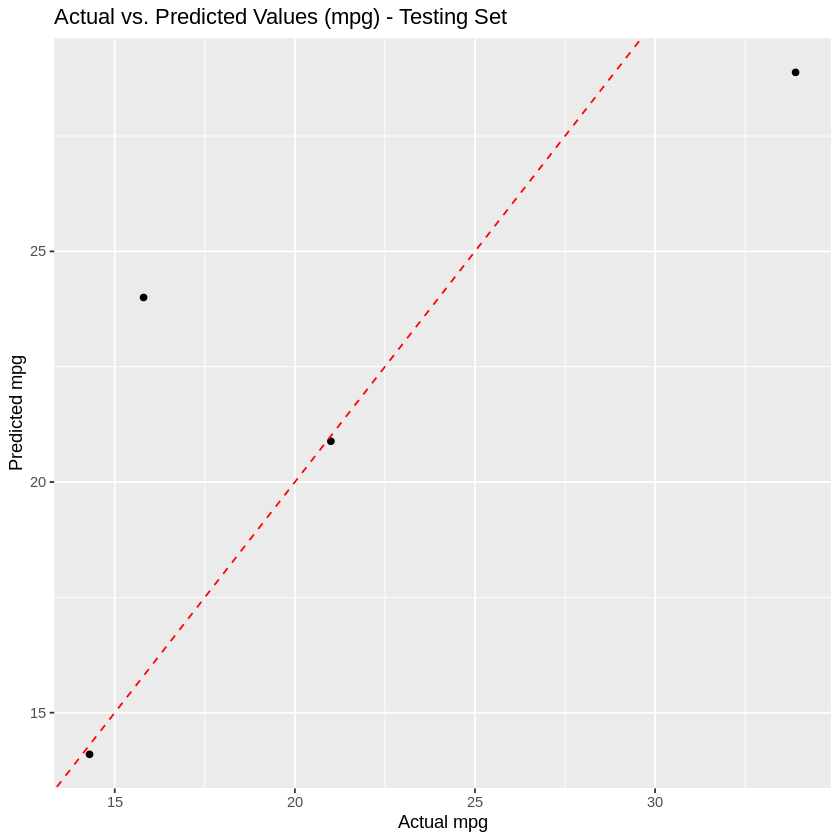

In [ ]:
# Predict on Testing Set
predictions <- predict(model, newdata = X_test)

# Create a data frame for actual vs. predicted values
results <- data.frame(Actual = Y_test, Predicted = predictions)

# Visualize Results for Testing Set
ggplot(results, aes(x = Actual, y = Predicted)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(title = "Actual vs. Predicted Values (mpg) - Testing Set",
       x = "Actual mpg",
       y = "Predicted mpg")

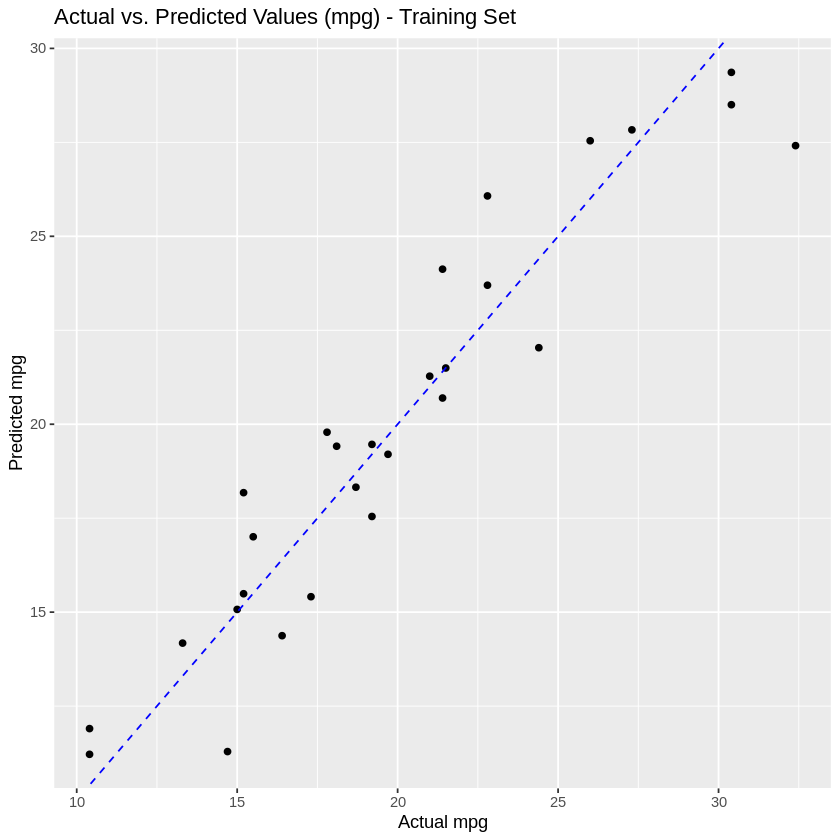

In [ ]:
# Visualize Results for Training Set

predictions_train <- predict(model, newdata = X_train)
results_train <- data.frame(Actual = Y_train, Predicted = predictions_train)

ggplot(results_train, aes(x = Actual, y = Predicted)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "blue", linetype = "dashed") +
  labs(title = "Actual vs. Predicted Values (mpg) - Training Set",
       x = "Actual mpg",
       y = "Predicted mpg")

In [ ]:
# Evaluate the model performance

# Calculate Root Mean Squared Error (RMSE)
rmse <- sqrt(mean((Y_test - predictions)^2))
print(paste("Root Mean Squared Error:", round(rmse, 2)))

[1] "Root Mean Squared Error: 4.81"


In [ ]:
# Calculate R-squared (R2) Score

r2_score <- R2(predictions, Y_test)
print(paste("R-squared (R2) Score:", round(r2_score, 2)))

[1] "R-squared (R2) Score: 0.63"


## **3. Logistic Regression in R**

In R, Logistic Regression stands as a prevalent statistical approach for binary classification endeavors. This method models the probability of an event occurring based on input features, utilizing a logistic function to confine the output within the range of 0 to 1. Logistic Regression in R is esteemed for its interpretability, computational efficiency, and applicability in comprehending the influence of individual features on the outcome. Techniques like L1 and L2 regularization are often employed to counter overfitting. The simplicity and efficacy of Logistic Regression make it a fundamental tool in predictive modeling within the R environment, especially when transparency and ease of interpretation are prioritized

In [ ]:
data(iris)

summary(iris)


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [ ]:
# Preprocess the dataset

# Convert the "Species" column to a binary response variable
iris$Response <- ifelse(iris$Species == "versicolor", 1, 0)

# Remove unnecessary columns
iris <- iris %>% select(-Species)

head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Response
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
6,5.4,3.9,1.7,0.4,0


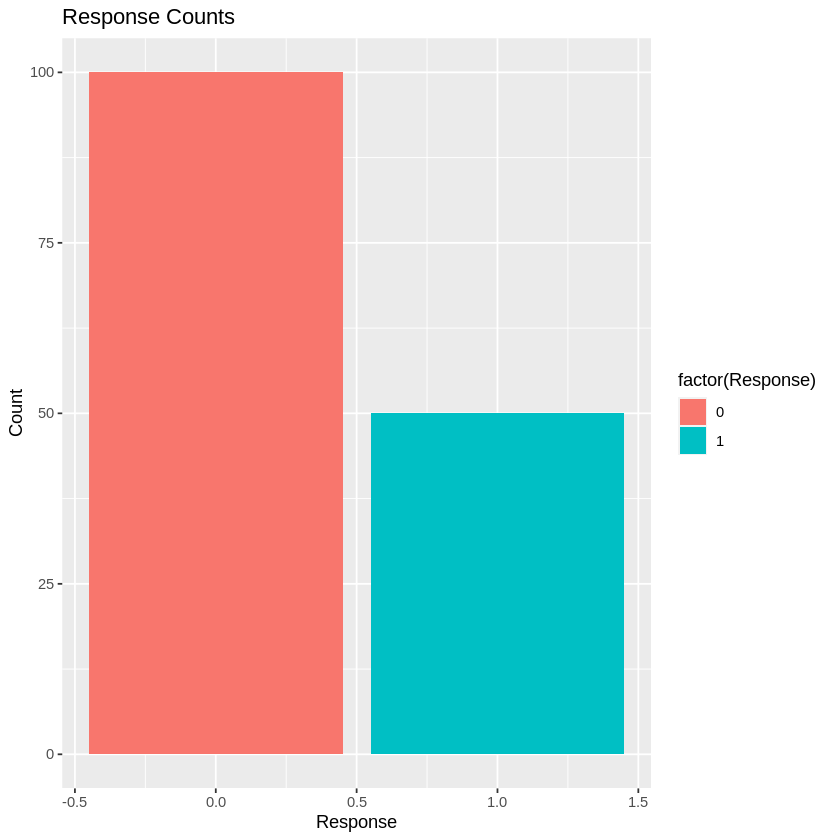

In [ ]:
# Bar Graph for Response Counts

bar_plot <- ggplot(iris, aes(x = Response, fill = factor(Response))) +
  geom_bar() +
  labs(title = "Response Counts",
       x = "Response",
       y = "Count")


print(bar_plot)

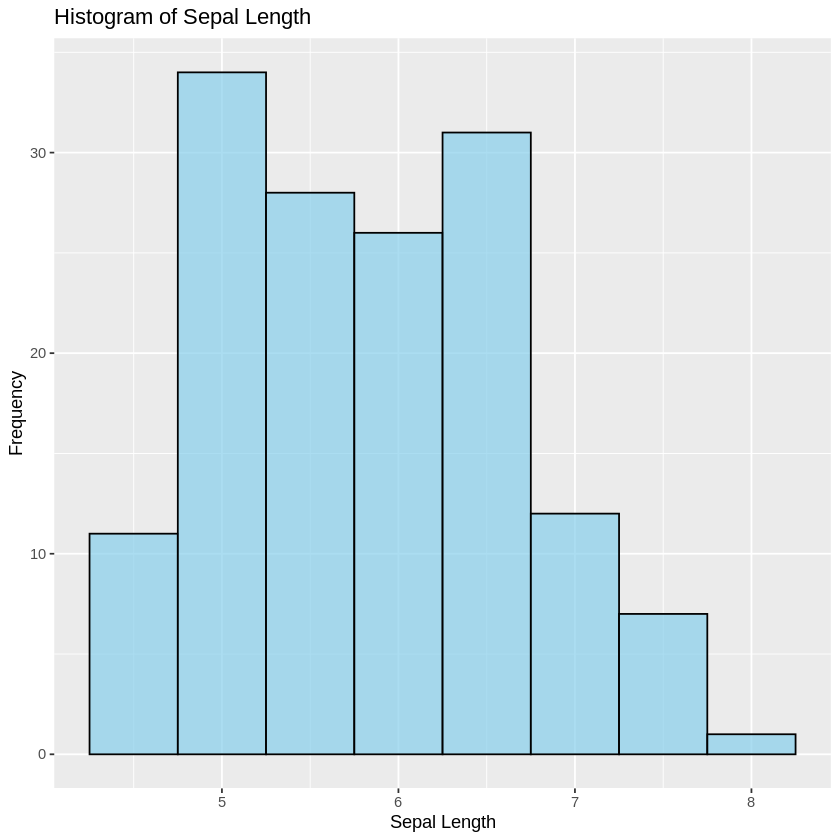

In [ ]:
# Histogram for Sepal Length

hist_plot <- ggplot(iris, aes(x = Sepal.Length)) +
  geom_histogram(binwidth = 0.5, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Sepal Length",
       x = "Sepal Length",
       y = "Frequency")

print(hist_plot)

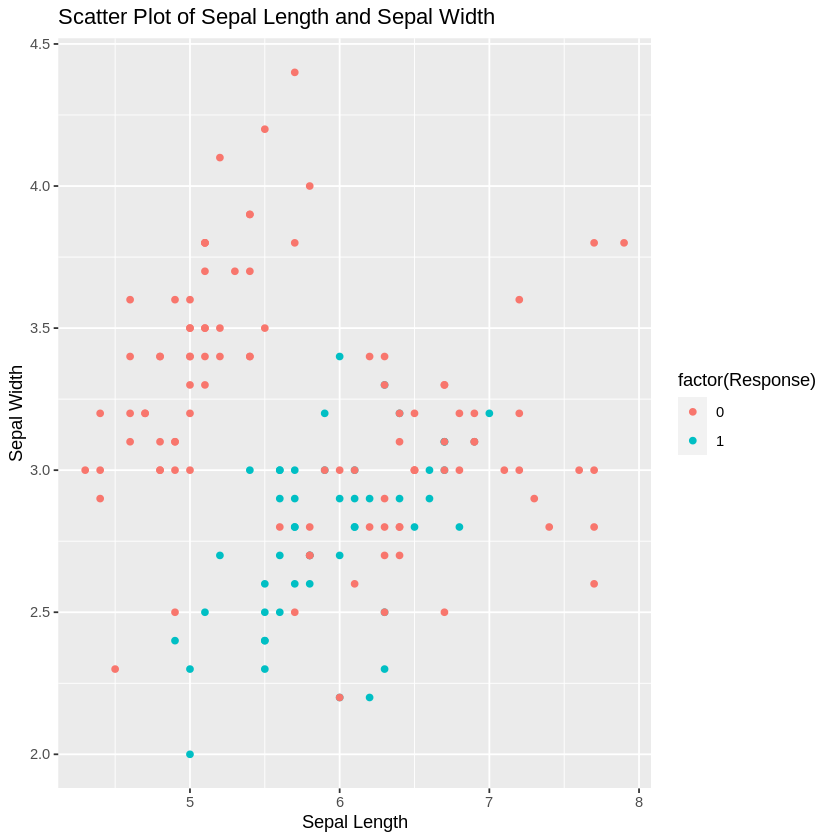

In [ ]:
# Scatter Plot for Sepal Length and Sepal Width

scatter_plot <- ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, color = factor(Response))) +
  geom_point() +
  labs(title = "Scatter Plot of Sepal Length and Sepal Width",
       x = "Sepal Length",
       y = "Sepal Width")


print(scatter_plot)

In [ ]:
iris <- na.omit(iris)

In [ ]:
# Split the dataset

set.seed(123)
index <- createDataPartition(iris$Response, p = 0.8, list = FALSE)
train_data <- iris[index, ]
test_data <- iris[-index, ]


In [ ]:
# Implement Logistic Regression on Training Set
model <- glm(Response ~ ., data = train_data, family = binomial)

# View the summary of the logistic regression model
summary(model)


Call:
glm(formula = Response ~ ., family = binomial, data = train_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)    6.7259     2.7504   2.445  0.01447 * 
Sepal.Length  -0.3182     0.7198  -0.442  0.65840   
Sepal.Width   -2.5010     0.8194  -3.052  0.00227 **
Petal.Length   1.2567     0.7343   1.711  0.08700 . 
Petal.Width   -2.6268     1.2530  -2.096  0.03604 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 144.87  on 119  degrees of freedom
Residual deviance: 114.25  on 115  degrees of freedom
AIC: 124.25

Number of Fisher Scoring iterations: 5


In [ ]:
# Predict on Testing Set
predictions <- predict(model, newdata = test_data, type = "response")

# Create a confusion matrix
conf_matrix <- table(Actual = test_data$Response, Predicted = ifelse(predictions > 0.5, 1, 0))

# Visualize the confusion matrix
conf_matrix

      Predicted
Actual  0  1
     0 14  1
     1 10  5

In [ ]:
# Evaluate model performance

accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Accuracy:", round(accuracy, 2)))

[1] "Accuracy: 0.63"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



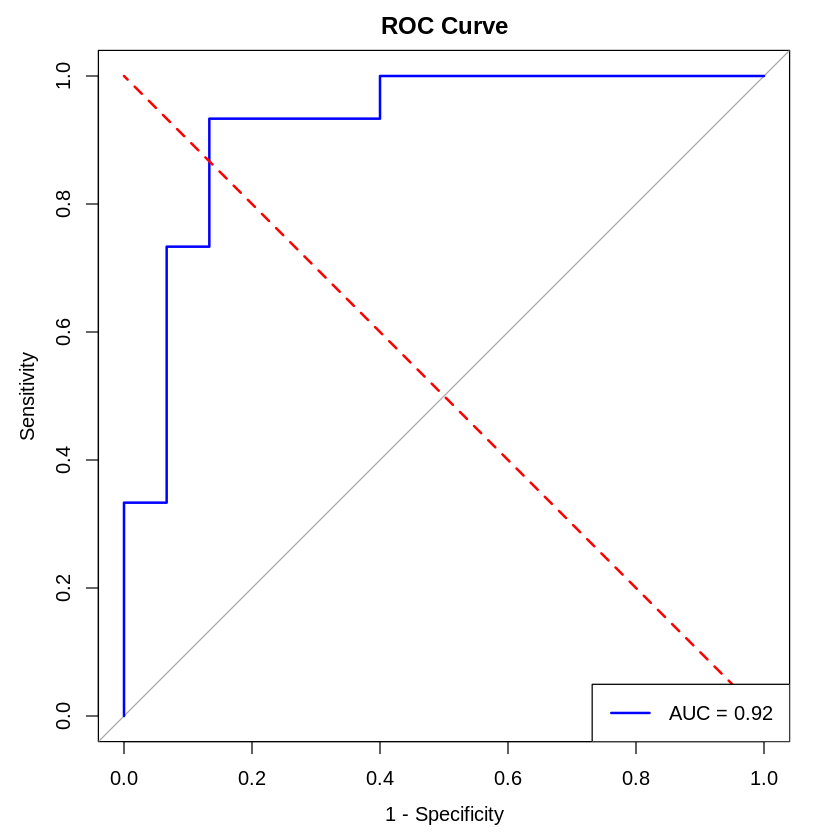

In [ ]:
# Create a ROC curve

roc_curve <- roc(test_data$Response, predictions)
auc_score <- auc(roc_curve)


plot(roc_curve, main = "ROC Curve", col = "blue", lwd = 2, legacy.axes = TRUE)
lines(c(0, 1), c(0, 1), col = "red", lty = 2, lwd = 2)
legend("bottomright", legend = paste("AUC =", round(auc_score, 2)), col = "blue", lwd = 2)

## **4. Feature selection and Data visualization**

In R, feature selection is a crucial step that entails identifying and preserving the most pertinent features within a dataset. This practice aims to boost model efficiency, mitigate overfitting, and enhance interpretability. Various techniques are available, including filter methods that assess individual feature relevance, wrapper methods that leverage model performance, and embedded methods that seamlessly integrate feature selection into the model training process. The selection process often considers factors like domain knowledge and model-specific behaviors. Efficient feature selection in R can markedly improve model accuracy and streamline computational complexity

In [ ]:
data(iris)

summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [ ]:
# Preprocess the dataset

# Convert the "Species" column to a binary response variable
iris$Response <- ifelse(iris$Species == "versicolor", 1, 0)

# Remove unnecessary columns
iris <- iris %>% select(-Species)

In [ ]:
# Split the dataset

set.seed(123)
index <- createDataPartition(iris$Response, p = 0.8, list = FALSE)
train_data <- iris[index, ]
test_data <- iris[-index, ]

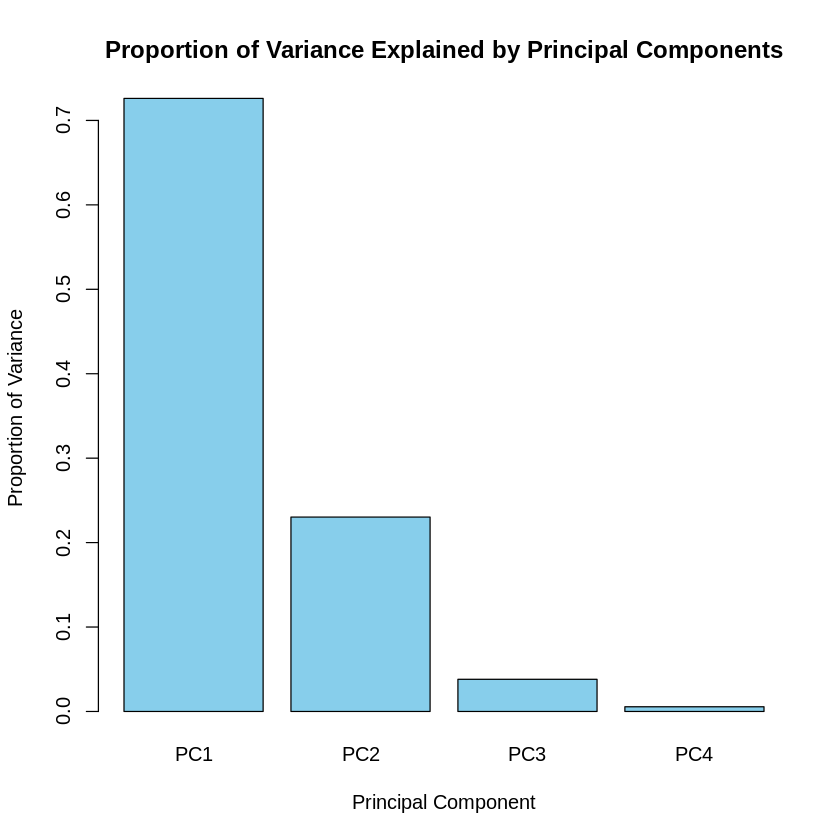

In [ ]:
# Feature Selection using PCA

# Check if "Response" column exists
if ("Response" %in% colnames(train_data)) {
  # Standardize the features, excluding the "Response" column
  scaled_features <- scale(train_data[, !colnames(train_data) %in% "Response"])

  # Apply PCA
  pca_result <- prcomp(scaled_features, center = TRUE, scale. = TRUE)

  # Plot the proportion of variance explained by each principal component
  summary(pca_result)$importance[2, ] %>%
    barplot(main = "Proportion of Variance Explained by Principal Components",
            xlab = "Principal Component",
            ylab = "Proportion of Variance",
            col = "skyblue")

  # Select the number of principal components based on the plot and set it to 'n_components'
  n_components <- 2

  # Extract the selected principal components
  pca_features <- as.data.frame(predict(pca_result, newdata = scaled_features)[, 1:n_components])

  # Combine PCA features with the response variable
  train_data <- cbind(train_data[, "Response", drop = FALSE], pca_features)

  # Continue with the rest of the code...
} else {
  print("Error: 'Response' column not found in the dataset.")
}


In [ ]:
# Implement Random Forest model using selected features
rf_model <- randomForest(Response ~ ., data = train_data)

# Predict on Testing Set
scaled_test_data <- scale(test_data[, !colnames(test_data) %in% "Response"])
pca_test_features <- as.data.frame(predict(pca_result, newdata = scaled_test_data)[, 1:n_components])
test_data_pca <- cbind(test_data[, "Response", drop = FALSE], pca_test_features)
predictions <- predict(rf_model, newdata = test_data_pca)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


In [ ]:
# Create a confusion matrix
conf_matrix <- table(Actual = test_data$Response, Predicted = predictions)

conf_matrix

      Predicted
Actual 3.10862446895044e-18 3.21964677141295e-18 3.33066907387547e-18 0.001
     0                    1                    1                    1     1
     1                    0                    0                    0     0
      Predicted
Actual 0.0013 0.0046 0.0176666666666667 0.0194 0.0427 0.0478 0.0588 0.0673
     0      1      1                  0      2      1      1      1      1
     1      0      0                  1      0      0      0      0      0
      Predicted
Actual 0.0679 0.0715 0.114 0.1331 0.139533333333333 0.307566666666667 0.5914
     0      1      1     0      1                 0                 0      0
     1      0      0     1      0                 1                 1      1
      Predicted
Actual 0.679233333333333 0.688266666666667 0.711233333333333 0.7197 0.7253
     0                 0                 0                 0      0      0
     1                 1                 1                 1      1      1
      Predicted
Actual 0.77

In [ ]:
# Evaluate model performance (e.g., calculate accuracy)

accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Accuracy:", round(accuracy, 2)))

[1] "Accuracy: 0.03"
